In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import pickle
import random
import torch
import numpy as np
from statistics import mode, StatisticsError
from IPython.display import Image, display
from termcolor import colored as cld
from emoji import emojize as emo

pic_dir = "/home/like/Datasets/Pythia/train_images"

answer_types = ["mode fails", "single ocr", "composed ocr", "directly in vocab", "other"]
for i, t in enumerate(answer_types):
    print("{num}; {type}".format(
        num = i, 
        type = t))

0; mode fails
1; single ocr
2; composed ocr
3; directly in vocab
4; other


In [2]:
data = np.load("/home/like/Datasets/Pythia/data/imdb/textvqa_0.5/imdb_textvqa_train.npy", 
               allow_pickle=True)[1:]
print(data[0].keys())
len(data)

dict_keys(['question', 'image_id', 'image_classes', 'flickr_original_url', 'flickr_300k_url', 'image_width', 'image_height', 'answers', 'ocr_tokens', 'ocr_info', 'question_tokens', 'question_id', 'set_name', 'image_name', 'image_path', 'feature_path', 'valid_answers'])


34602

In [3]:
with open("/home/like/Datasets/Pythia/data/vocabs/answers_textvqa_more_than_1.txt", 'r') as f:
    voc = [v[:-1] for v in f.readlines()]
len(voc)

3997

In [4]:
valid_answers = []
for i in range(34602):
    try:
        valid_answers.append(mode(data[i]["valid_answers"]))
    except StatisticsError:
        # Groud_truth answer ambiguous, leave out this datapoint
        valid_answers.append("__mode_fails_this__")
len(valid_answers)

34602

In [5]:
# validation set situation
valid_answer_type = []
exc = []

for i in range(len(data)):
    a = valid_answers[i]
    o = [tmp.lower() for tmp in data[i]["ocr_tokens"]]
    index_ans = [(o.index(w)+1 if w in o else 0) for w in a.split(' ')]
    if a == "__mode_fails_this__":
        valid_answer_type.append(0)
    elif a in o:
        valid_answer_type.append(1)
    elif all(index_ans):
        valid_answer_type.append(2)
    elif a in voc:
        valid_answer_type.append(3)
    else:
        valid_answer_type.append(4)
        exc.append(i)
types_count = [valid_answer_type.count(i) for i in range(len(answer_types))]
for i in range(len(answer_types)):
    print("{ty}: {pt:.0f}%".format(
        ty=answer_types[i], 
        pt=types_count[i]/len(data)*100))
print("by extensive data check, \"other\" part of the data are unanswerable due to OCR error")

mode fails: 6%
single ocr: 28%
composed ocr: 11%
directly in vocab: 35%
other: 20%
by extensive data check, "other" part of the data are unanswerable due to OCR error


In [6]:
def play_one(i):
    print("context tokens: " + str(data[i]["ocr_tokens"]).lower())
    print(cld("# "+str(i)+": " +
                  data[i]["question"], color="red", attrs=["bold"]))
    print(cld("valid answer: " + valid_answers[i], color="green", attrs=["bold"]))
    print(cld("answer type: " + answer_types[valid_answer_type[i]], color="magenta", attrs=["bold"]))
    image_id = data[i]["image_name"]
    display(Image(filename=os.path.join(pic_dir, str(image_id)+".jpg")))
    

context tokens: ['the', 'kitchen', 'store', 'ocal', 'root', '221', 'open']
# 18722: what store is shown?
valid answer: the kitchen store
answer type: composed ocr


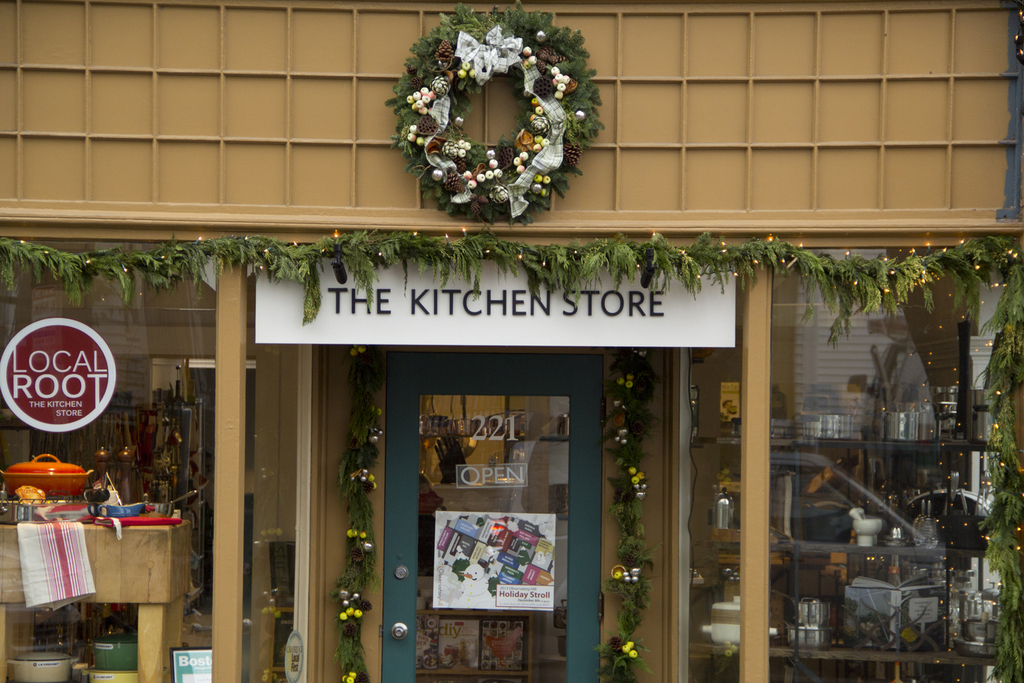

In [7]:
i = random.randint(0, len(data)-1)
play_one(i)